In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
plt.style.use('fivethirtyeight')

In [46]:
#!pip install yfinance

In [24]:
import yfinance as yf

# Download 10 years of historical data for Apple
data = yf.download("AAPL", start="2014-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [25]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-01-02 00:00:00+00:00,17.234303,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03 00:00:00+00:00,16.855736,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06 00:00:00+00:00,16.947647,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07 00:00:00+00:00,16.826441,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08 00:00:00+00:00,16.933004,19.409286,19.484285,19.238930,19.243214,258529600


In [17]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22 00:00:00+00:00,192.656174,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26 00:00:00+00:00,192.108856,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27 00:00:00+00:00,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28 00:00:00+00:00,192.636261,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29 00:00:00+00:00,191.591385,192.529999,194.399994,191.729996,193.899994,42628800


In [18]:
data.shape

(2516, 6)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2516 non-null   float64
 1   (Close, AAPL)      2516 non-null   float64
 2   (High, AAPL)       2516 non-null   float64
 3   (Low, AAPL)        2516 non-null   float64
 4   (Open, AAPL)       2516 non-null   float64
 5   (Volume, AAPL)     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [20]:
data.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

## EDA

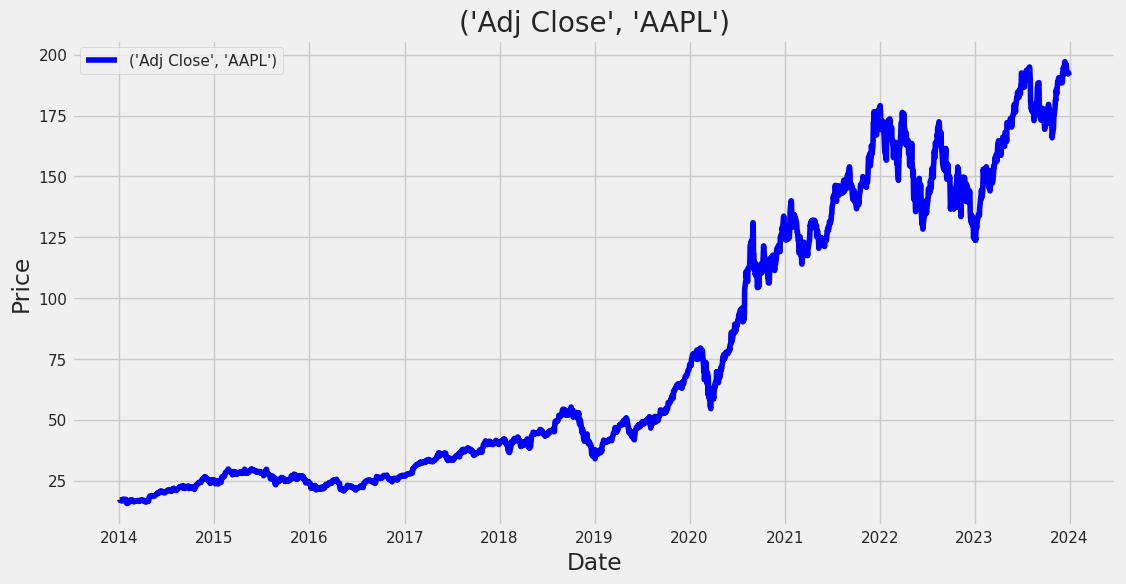

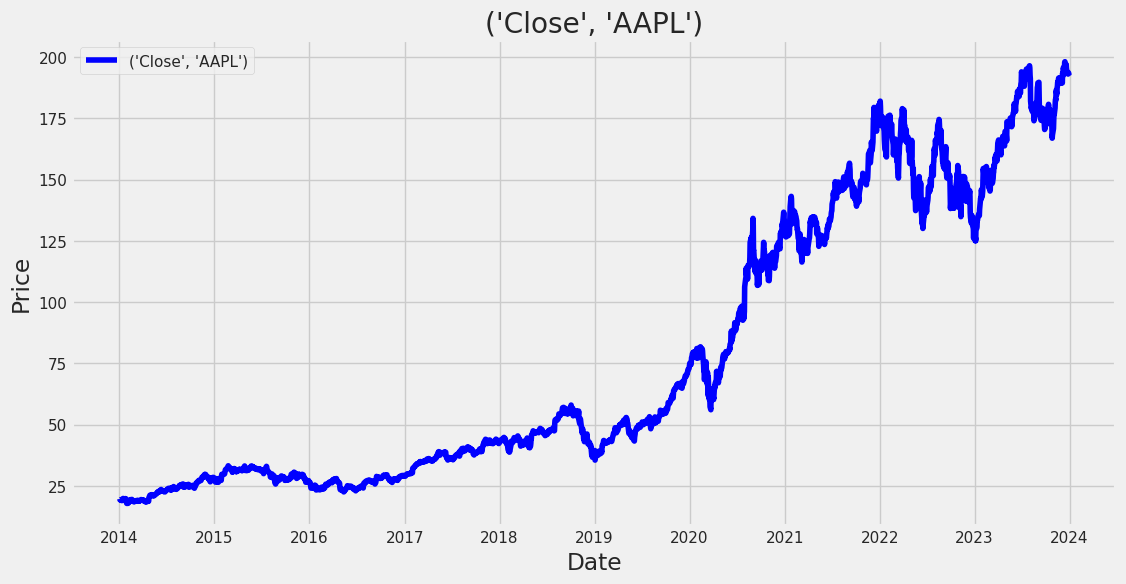

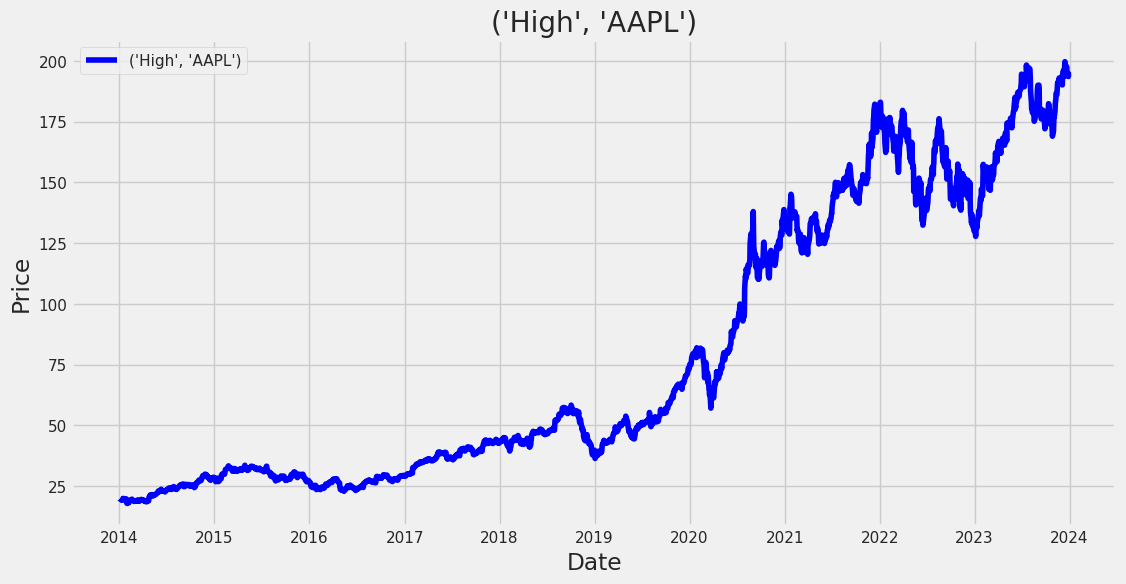

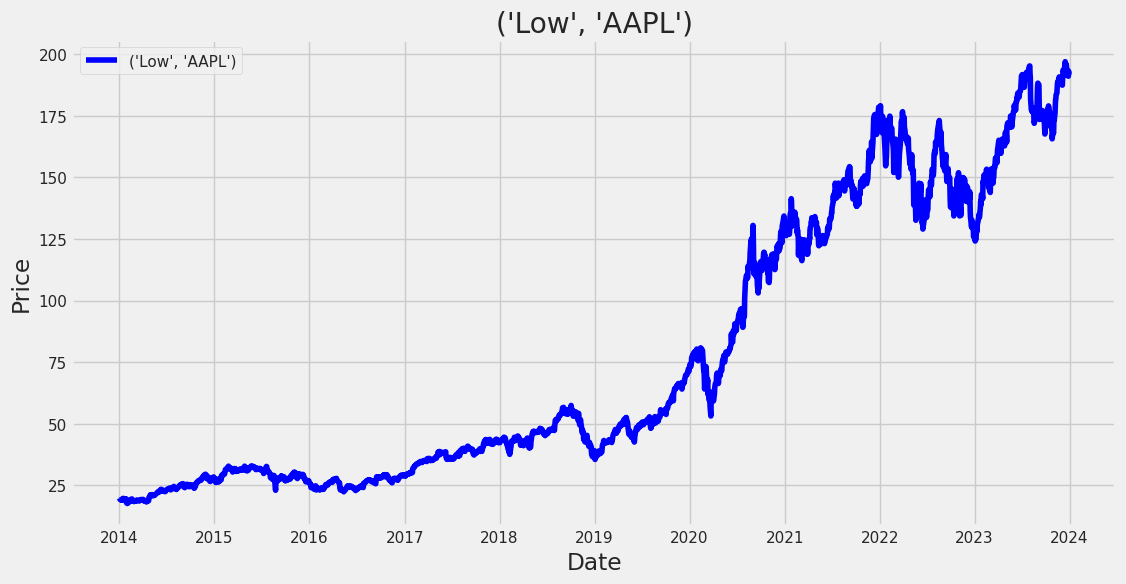

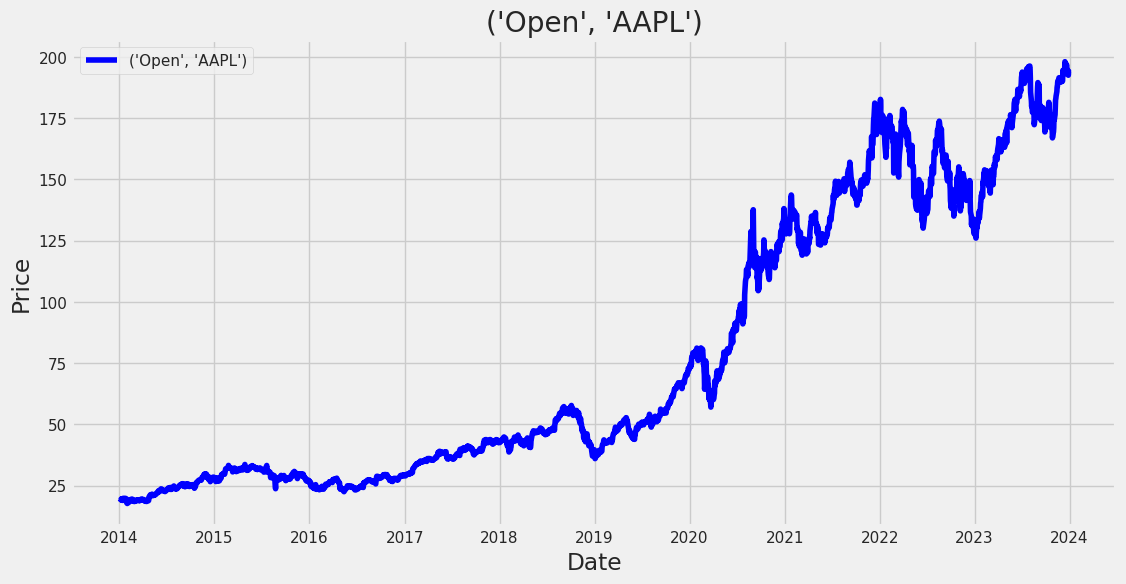

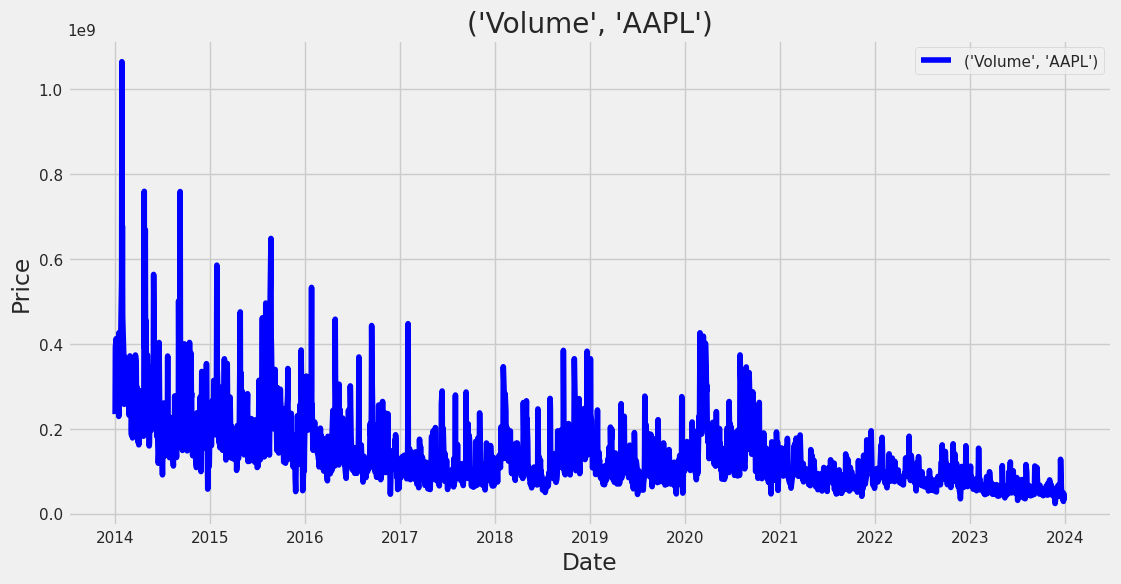

In [50]:
for col in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], label=col, color='blue')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


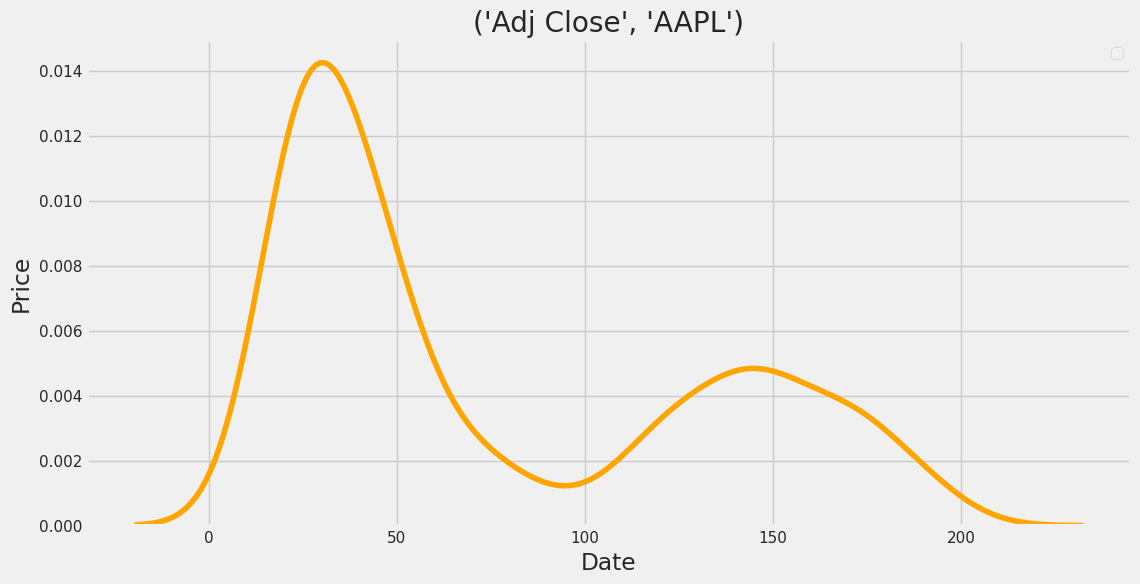

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


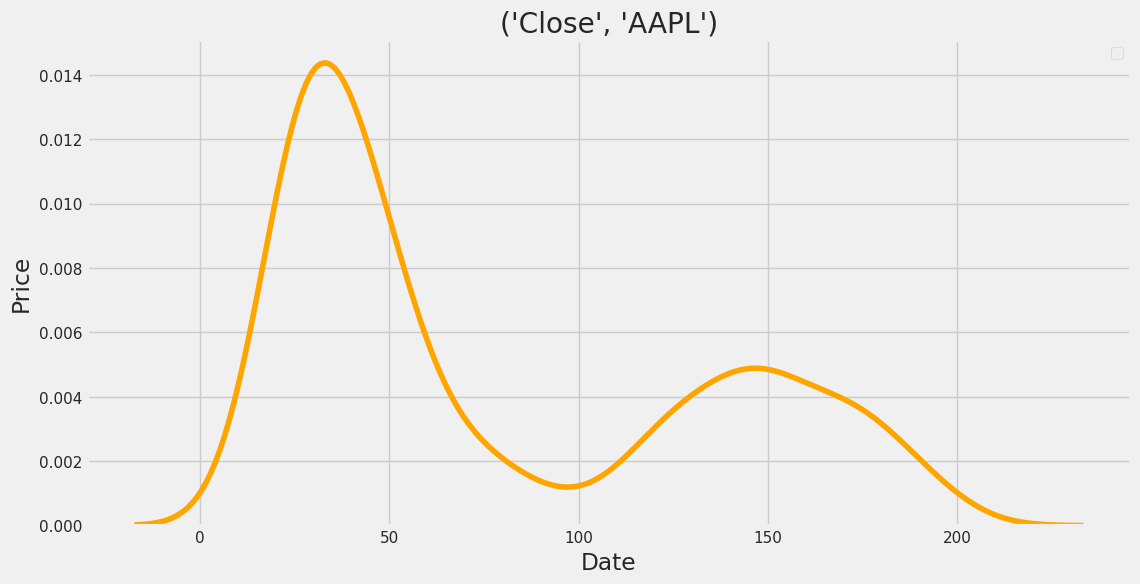

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


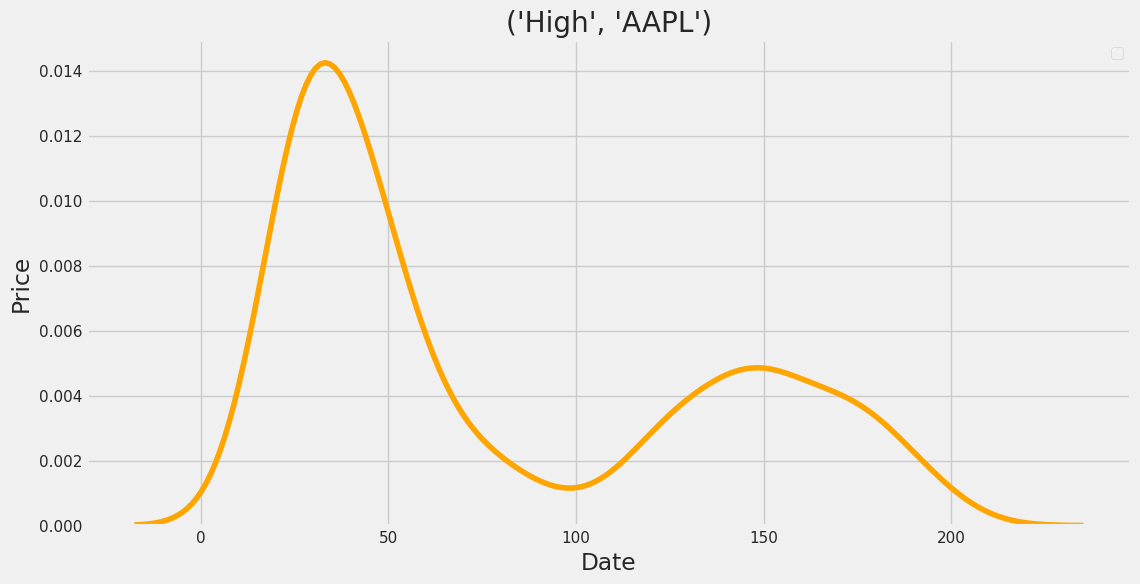

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


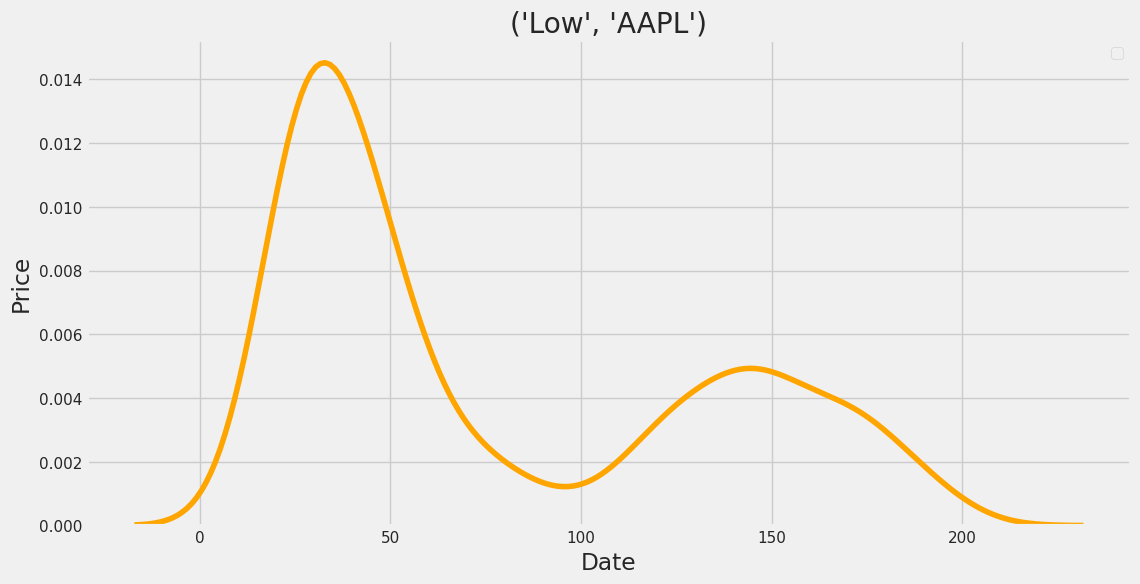

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


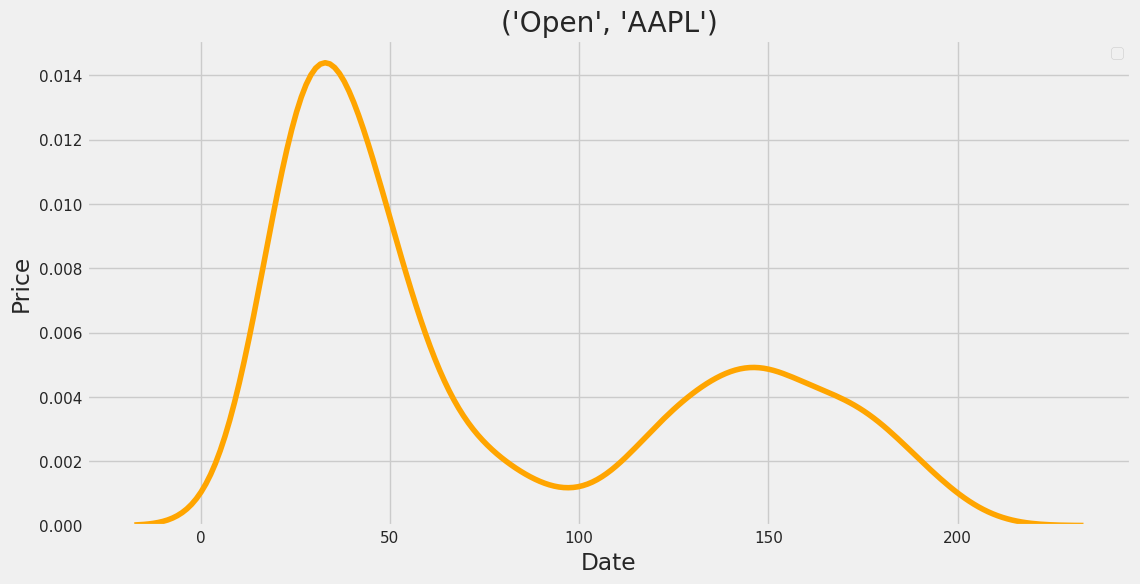

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


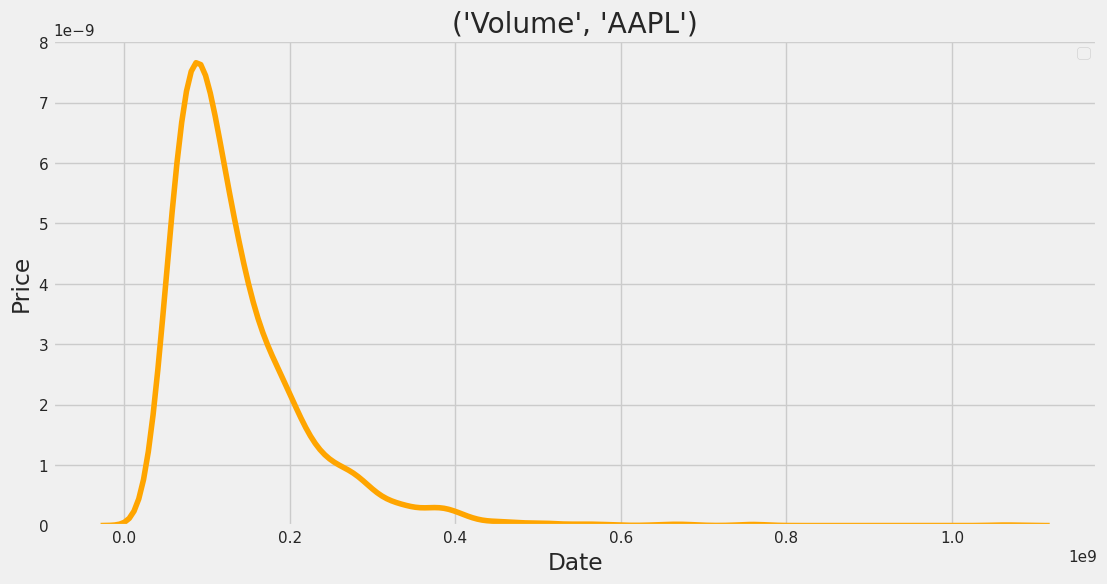

In [63]:
for col in data.columns:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(x = col, data = data,color = 'orange')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

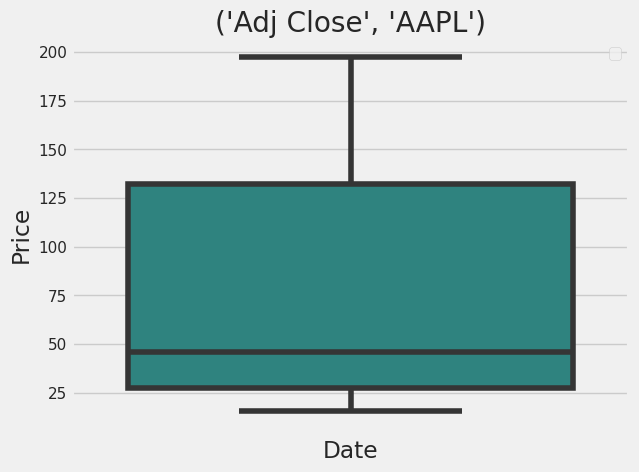

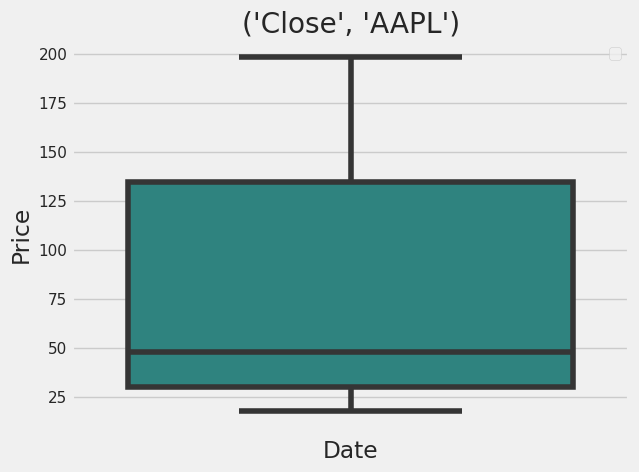

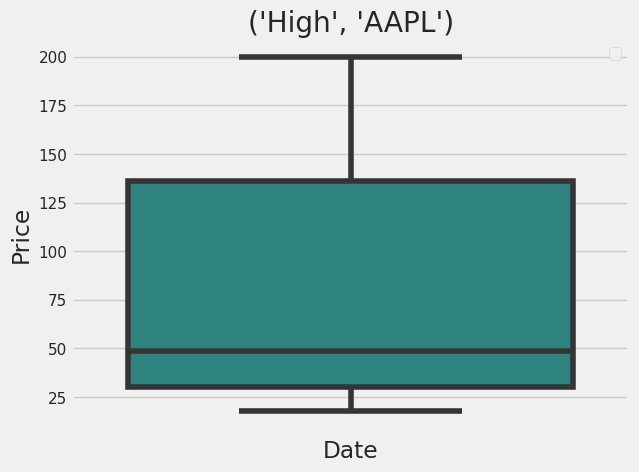

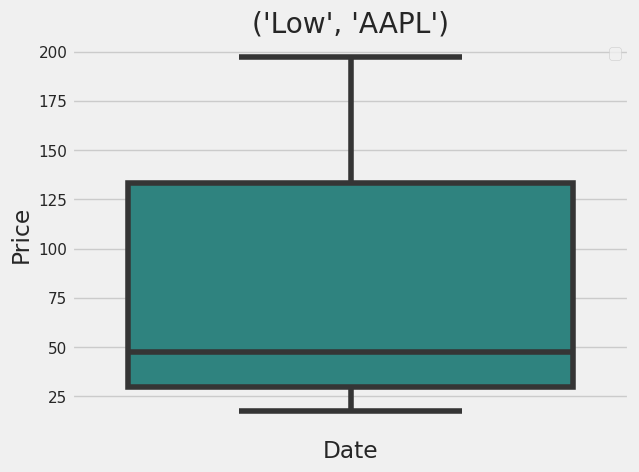

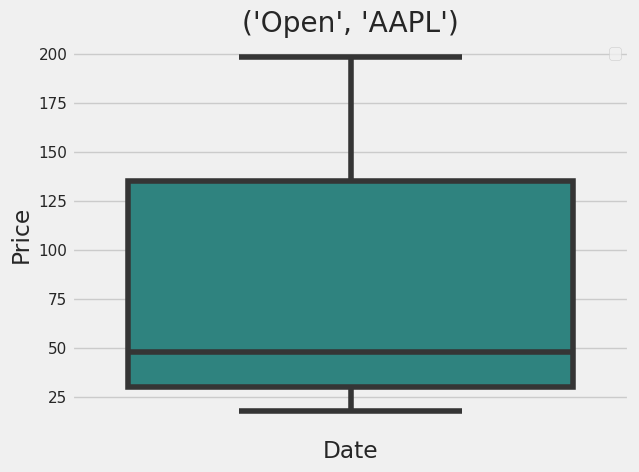

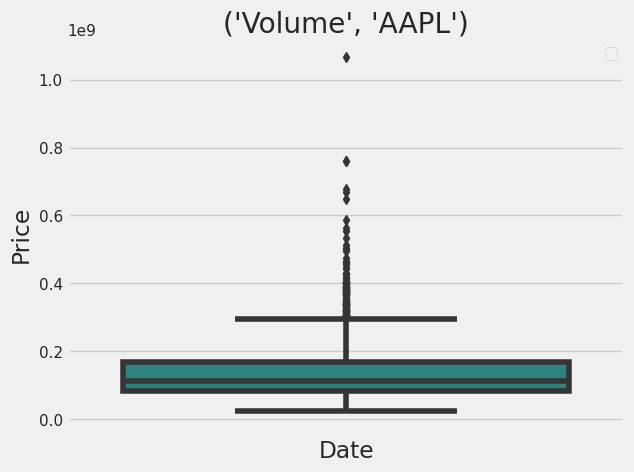

In [56]:
for col in data.columns:
    sns.boxplot(y = col, data = data,palette = 'viridis')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

## Regression model building

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [51]:
preds[:5]

array([[179.4097006 ],
       [179.24214074],
       [178.29831867],
       [181.85420765],
       [180.15768103]])

In [53]:
y_test[:5].values

array([[179.38000488],
       [178.19999695],
       [177.57000732],
       [182.00999451],
       [179.69999695]])

## Model evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
print(f'RMSE: {rmse}, MAE: {mae}')
print('R^2 score ',r2_score(y_test,preds))

RMSE: 1.0012401945230773, MAE: 0.7921716287242713
R^2 score  0.9967891992636365


## Actual vs Predicted Price

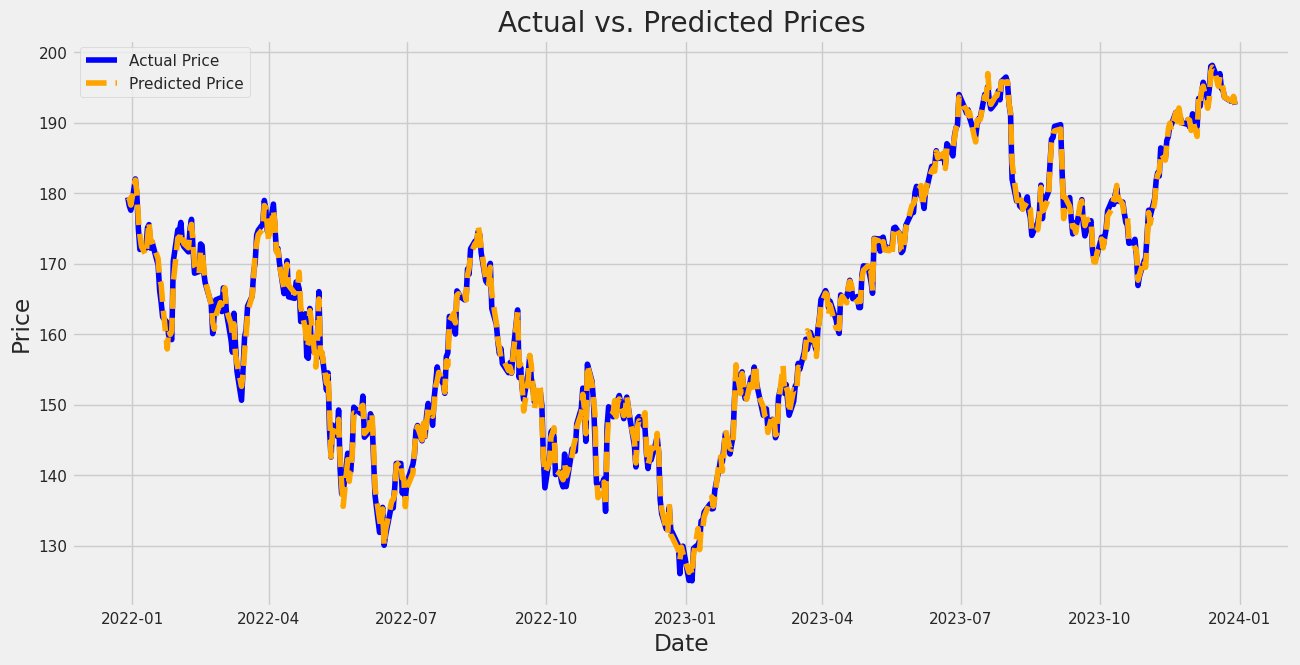

In [43]:

plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(preds):], data['Close'][-len(preds):], color='blue', label='Actual Price')
plt.plot(data.index[-len(preds):], preds, color='orange', linestyle='--', label='Predicted Price')
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Monthly Average Price

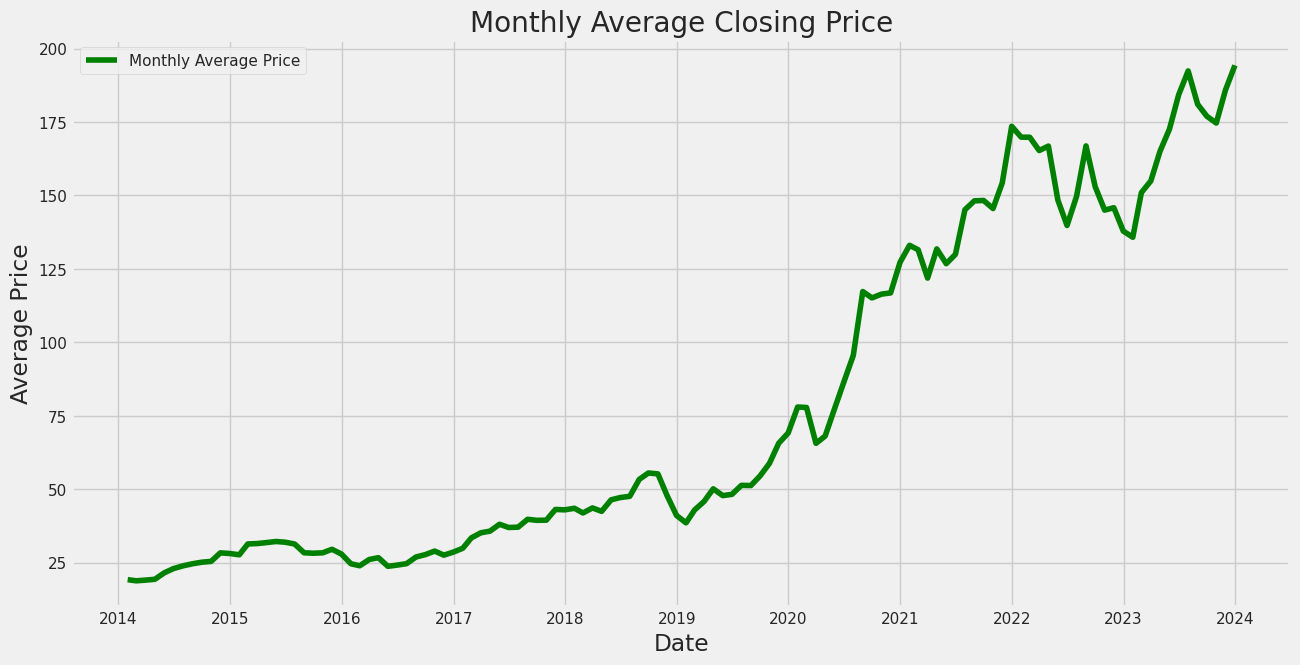

In [45]:

monthly_data = data['Close'].resample('ME').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data, color='green', label='Monthly Average Price')
plt.title("Monthly Average Closing Price")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.show()